# Intro to Keras (CNN revision) - Lab 3

In [1]:
import numpy as np
np.random.seed(420)

In [17]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

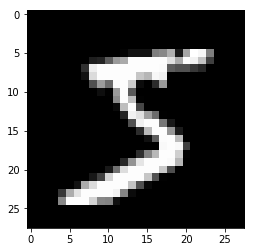

5


In [18]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],'gray')
plt.show()

print(y_train[0])

In [19]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [20]:
x_train = x_train.reshape((len(x_train),28,28,1))
print(x_train.shape)

(60000, 28, 28, 1)


In [22]:
from keras.utils import np_utils

y_train_onehot = np_utils.to_categorical(y_train,10)

print(y_train_onehot.shape)

(60000, 10)


In [25]:
x_test = x_test.reshape((len(x_test),28,28,1))
y_test_onehot = np_utils.to_categorical(y_test,10)


In [33]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train /= 255.
x_test /= 255.


In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, Activation

In [49]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128,activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [50]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
__________

In [51]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
model.fit(x_train,y_train_onehot,epochs=10,validation_split=0.2,batch_size=128)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 4096/48000 [=>............................] - ETA: 1:26 - loss: 2.4572 - acc: 0.0986

KeyboardInterrupt: 

In [53]:
model.save('model.h5')

In [54]:
from keras.models import load_model

new_model = load_model('model.h5')